# Experiment 1: Doing 1-D regression and see whether NP can learn the underlying shared mechanism between tastks (same kernel structure in GP)

In [2]:
import numpy as np
import GPy
import matplotlib.pylab as plt

from NP_algorithm import *

%matplotlib inline
plt.style.use('seaborn')

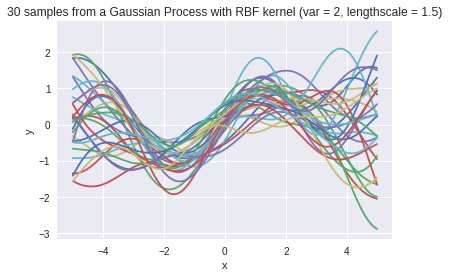

In [135]:
# Simulate a GP
x = np.random.uniform(-3, 3, (20, 1))
y = np.sin(x) + np.random.randn(20, 1) * 0.05

# Setup kernel
kernel = GPy.kern.RBF(input_dim=1, variance=2, lengthscale=1.5)

# Setup model but not train it
m = GPy.models.GPRegression(x,y,kernel)

# Plot
xx = np.linspace(-5, 5, 1000).reshape(-1,1)
posterior_y = np.matrix(m.posterior_samples_f(X=xx, size=30))

for i in range(30):
    plt.plot(xx, posterior_y[:, i])
    plt.title("30 samples from a Gaussian Process with RBF kernel (var = 2, lengthscale = 1.5)")
    plt.xlabel("x")
    plt.ylabel("y")

### Now create 20 training set each with 10 instances each + 10 test set with 10 instances each as well.

In [141]:
# Randomly pick 10 labels for each set
label_mat = np.matrix(np.random.choice(1000,size=(10,30)))
full_set = []

for col in range(30):
    full_set.append([xx.reshape(1,-1)[0][label_mat[:,col]], np.array(posterior_y[label_mat[:,col], col])])

train_sets = full_set[0:20]
test_sets = full_set[20:]

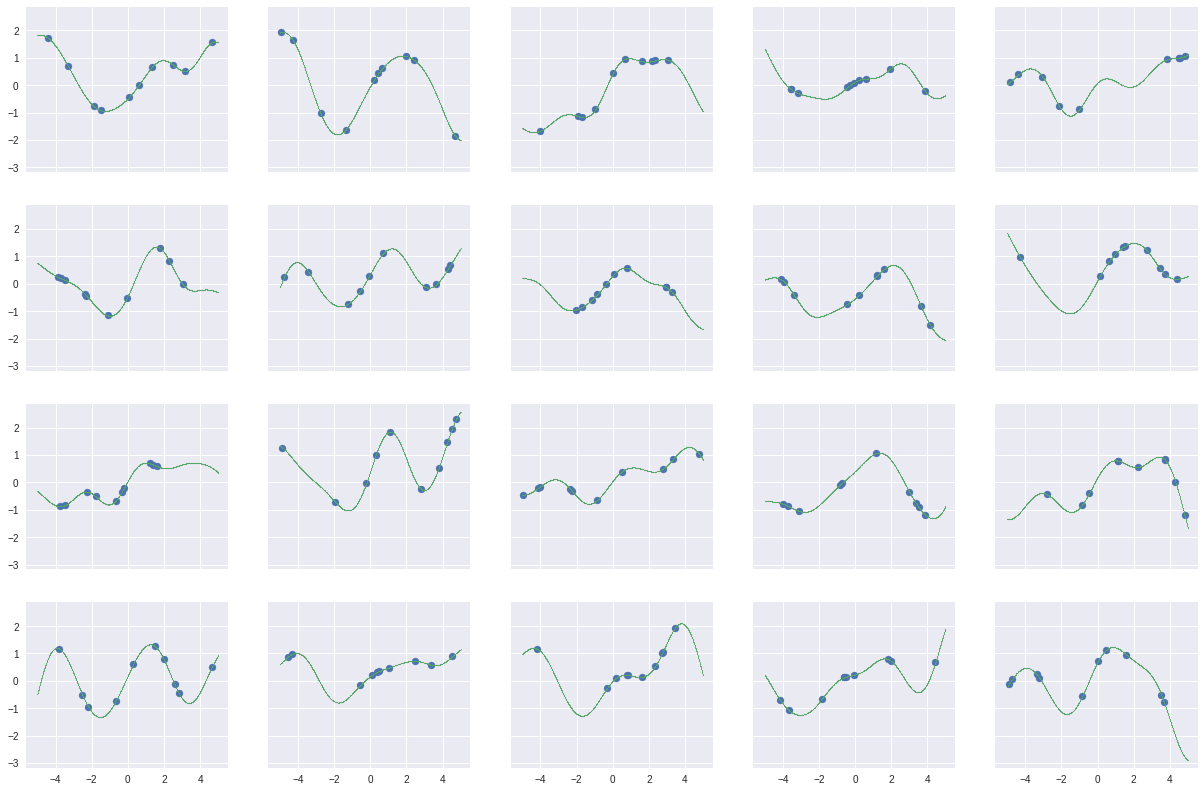

In [144]:
fig, axes = plt.subplots(4, 5, figsize = (21, 14), sharex = True, sharey=True)

for i in range(20):
    if i < 5:
        axes[0, i].scatter(train_sets[i][0], np.array(train_sets[i][1]))
        axes[0, i].scatter(xx, np.array(posterior_y[:,i]), s=0.5)
    elif i < 10:
        axes[1, i%5].scatter(train_sets[i][0], np.array(train_sets[i][1]))
        axes[1, i%5].scatter(xx, np.array(posterior_y[:,i]), s=0.5)
    elif i < 15:
        axes[2, i%5].scatter(train_sets[i][0], np.array(train_sets[i][1]))
        axes[2, i%5].scatter(xx, np.array(posterior_y[:,i]), s=0.5)
    elif i < 20:
        axes[3, i%5].scatter(train_sets[i][0], np.array(train_sets[i][1]))
        axes[3, i%5].scatter(xx, np.array(posterior_y[:,i]), s=0.5)

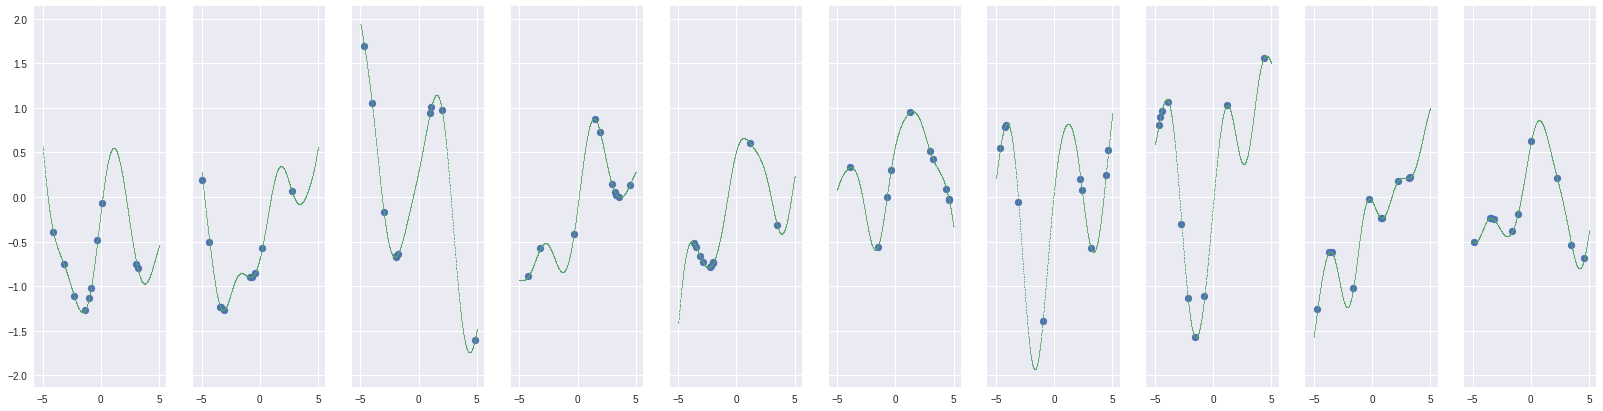

In [143]:
# target set
fig, axes = plt.subplots(1, 10, figsize = (28, 7), sharex = True, sharey=True)

for i in range(10):
    axes[i].scatter(test_sets[i][0], np.array(test_sets[i][1]))
    axes[i].scatter(xx, np.array(posterior_y[:,i+20]), s=0.5)

# Fit a NP to those our training set

* Idea: in each training time, split the training set into context set + target set.
* Goal: Learn the covariance structure underlying the tasks.

In [159]:
x_array = []
y_array = []
for i in range(len(train_sets)):
    x_array.append(train_sets[i][0])
    y_array.append(train_sets[i][1])
